In [16]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Variables
activities: list[str] = ['Elicitation', 'Analysis', 'Modeling', 'Validation & Verification', 'Management', 'Other']
tasks: list[str] = ['Detection', 'Extraction', 'Classification', 'Modeling', 'Tracing & Relating', 'Search & Retrieval', 'Generation']
availability: list[str] = ['Proprietary', 'Private', 'Unavailable', 'Broken', 'Upon Request', 'Reachable', 'Open Source', 'Archived']
availability_color = {
    'Proprietary': '#424242', 
    'Private': '#b8b8b8', 
    'Unavailable': '#990000', 
    'Broken': '#e69238', 
    'Upon Request': '#bf9000', 
    'Reachable': '#f1c132', 
    'Open Source': '#6aa84f', 
    'Archived': '#0000ff'
}

In [8]:
# load the data
df = pd.read_excel('../data/nlp4re-tools-data.xlsx', sheet_name='Potential Articles', skiprows=2)

# filter for articles that have been included
dfinc = df[df['Verdict']=='included']

In [ ]:
# determine the amount of included papers per year per venue
combinations: dict = df[['Venue', 'Year']].value_counts().to_dict()

matrix = {venue: [0]*len(years) for venue in venues}
for venue in venues:
    for year in years:
        amount = 0
        if (venue, year) in combinations:
            amount = combinations[(venue,year)]
        matrix[venue][years.index(year)] = amount

dfmatrix = pd.DataFrame.from_dict(matrix, orient='index', columns=years)

# visualize the matrix as a heatmap
plt.figure(figsize=(5,4))
viz = sns.heatmap(data=dfmatrix, cmap='mako_r', annot=True)
viz.set(title='Number of included papers by venue and year', xlabel='Year', ylabel='Venue')

plt.savefig(fname=f'../figures/inclusion-matrix.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# determine the amount of tools per activity x task combination
combinations: dict = df[['RE Activity', 'Tool Task']].value_counts().to_dict()

# construct a matrix
matrix = {activity: [0]*len(tasks) for activity in activities}
for activity in activities:
    for tid, task in enumerate(tasks):
        amount = 0
        if (activity, task) in combinations:
            amount = combinations[(activity, task)]
        matrix[activity][tasks.index(task)] = amount

# turn the matrix back into a dataframe
dfmatrix = pd.DataFrame.from_dict(matrix, orient='index', columns=tasks)

# visualize the matrix as a heatmap
plt.figure(figsize=(4,3))
viz = sns.heatmap(data=dfmatrix, cmap='mako_r', annot=True)
viz.set(title='Tools by Activity and Task Type', xlabel='Task Type', ylabel='RE Activity')

plt.savefig(fname=f'../figures/tools_activityxtask.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [32]:
availability_count: dict = df['Availability'].value_counts().to_dict()
availability_count_ordered = {code: (availability_count[code] if (code in availability_count) else 0) for code in availability}

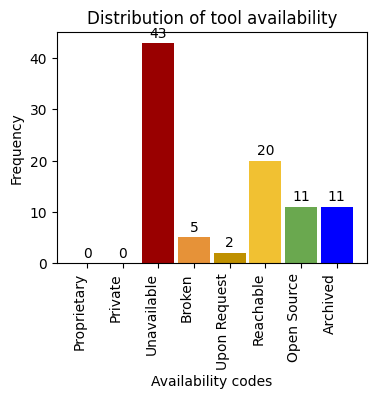

In [43]:
plt.figure(figsize=(4, 3))
ax = plt.subplot()
bar = plt.bar(x=availability_count_ordered.keys(), height=availability_count_ordered.values(), width=0.9, color=availability_color.values())
ax.bar_label(bar, padding=2)

plt.title('Distribution of tool availability')
plt.xlabel('Availability codes')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

plt.savefig(fname='../figures/availability_distribution.pdf', format='pdf', bbox_inches='tight')
plt.show()